In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df=pd.read_csv('iris.csv')


In [58]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [59]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])

In [61]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


<Axes: >

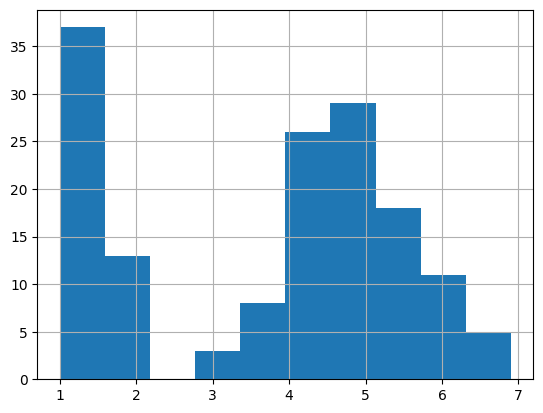

In [62]:
df['PetalLengthCm'].hist()

<Axes: >

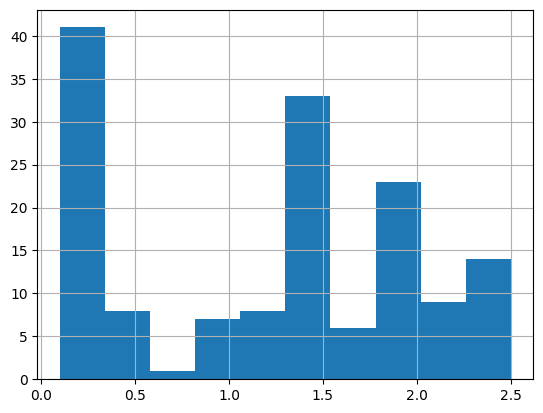

In [63]:
df['PetalWidthCm'].hist()

<Axes: >

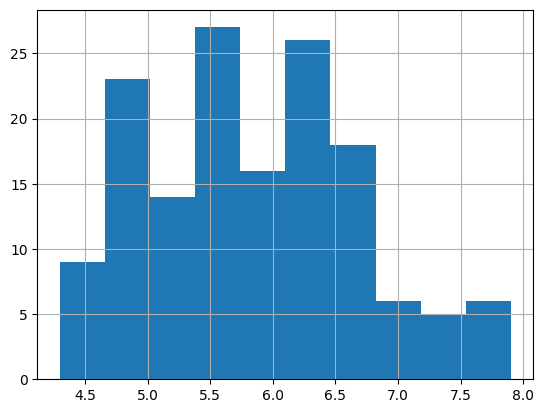

In [64]:
df['SepalLengthCm'].hist()

<Axes: >

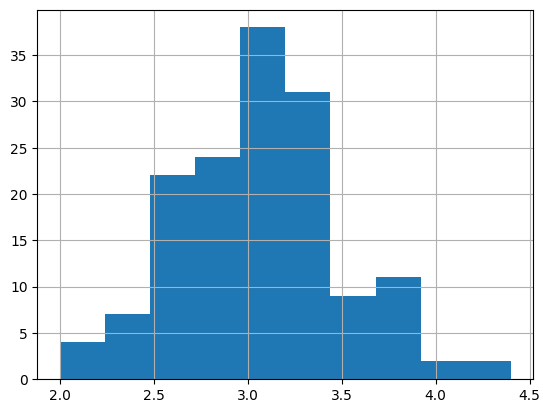

In [65]:
df['SepalWidthCm'].hist()

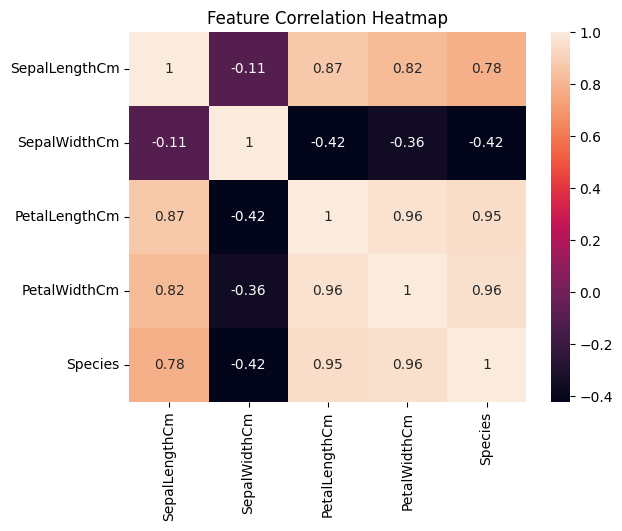

In [66]:
sub_df=df.drop(['Id'], axis=1)
sns.heatmap(sub_df.corr(), annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm','SepalWidthCm' ,'PetalLengthCm','PetalWidthCm']], df['Species'], test_size=0.3, random_state=42)

Logistic Regression

In [56]:
scaler = MinMaxScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [68]:
model_log=LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [69]:
print(model_log.score(X_train, y_train))
predicted_1=model_log.predict(X_test)

0.9619047619047619


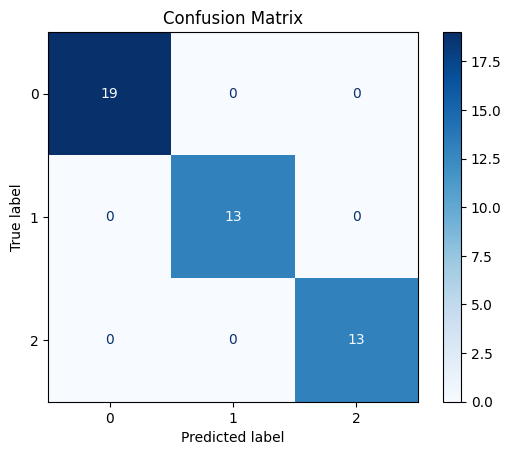

In [70]:
cm = confusion_matrix(y_test, predicted_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Species'].unique())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [71]:
report_1=classification_report(y_test, predicted_1, target_names=encoder.classes_)
print(report_1)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [74]:
import joblib

joblib.dump(model_log, 'iris_model.pkl')
joblib.dump(encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler_iris.pkl')

['scaler_iris.pkl']